<a href="https://colab.research.google.com/github/RRahul-Abrol/Starting-with-Agentic-Ai/blob/main/simple_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import TypedDict

class Portfoliostate(TypedDict):
  amount_usd :float
  total_usd :float
  total_inr :float



In [8]:
def calc_total(state:Portfoliostate) -> Portfoliostate:
  state['total_usd'] = state['amount_usd'] * 1.08
  return state

def convert_to_inr(state:Portfoliostate) ->Portfoliostate:
  state['total_inr'] = state['total_usd'] * 85
  return state

In [10]:
from langgraph.graph import StateGraph, START, END
builder= StateGraph(Portfoliostate)

builder.add_node("calc_total_node",calc_total)
builder.add_node("convert_to_inr_node",convert_to_inr)

builder.add_edge(START,"calc_total_node")
builder.add_edge("calc_total_node","convert_to_inr_node")
builder.add_edge("convert_to_inr_node",END)

graph=builder.compile()

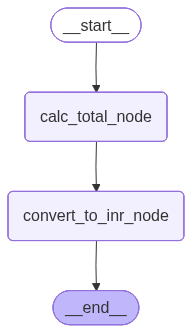

In [20]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"amount_usd":1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}